<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Notebook-practice" data-toc-modified-id="Notebook-practice-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook practice</a></span></li><li><span><a href="#Adiabatic-box" data-toc-modified-id="Adiabatic-box-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Adiabatic box</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Solution</a></span></li><li><span><a href="#The-final-temperature-$T_B$-(K)-in-box-B" data-toc-modified-id="The-final-temperature-$T_B$-(K)-in-box-B-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The final temperature $T_B$ (K) in box B</a></span></li><li><span><a href="#work-done-by-A-on-B" data-toc-modified-id="work-done-by-A-on-B-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>work done by A on B</a></span></li><li><span><a href="#Final-temperature-of-A" data-toc-modified-id="Final-temperature-of-A-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Final temperature of A</a></span></li><li><span><a href="#Get-temperature-equation-of-state" data-toc-modified-id="Get-temperature-equation-of-state-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Get temperature equation of state</a></span></li><li><span><a href="#Total-heating-of-A" data-toc-modified-id="Total-heating-of-A-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Total heating of A</a></span></li></ul></li></ul></div>

# Notebook practice

    
Write a function called "eqstate" that calculates the density of dry air.  Use it to find the dry air density
at a pressure of 80 kPa and temperatures of temp=[270, 280, 290] K

In [1]:
def eqstate(Temp,Press):
    dens = xxx
    return dens

In [2]:
import numpy as np

Rd = 287 #J/kg/K
def eqstate(temp,press):
    """
    Parameters
    ----------
    
    temp: float
         temperature (K)
    press: float
         press (Pa)
         
    Returns
    -------
    
    dens: float
         dry air density (kg/m^3)
    """
    dens = press/(Rd*temp)
    return dens


output = """
          {dots:}
          At pressure {press:6.0f} Pa and temperature {temp:6.2f} K 
          the air density is {dens:6.3f} kg/m3
          {dots:}
          """

dots = '*'*60
temps = np.array([270, 280, 290]) #K
press = 80.e3 #Pa
#
#  the function locals() returns a dictionary of all local variables
#
for temp in temps:
    dens = eqstate(temp,press)
    print(output.format_map(locals()))


          ************************************************************
          At pressure  80000 Pa and temperature 270.00 K 
          the air density is  1.032 kg/m3
          ************************************************************
          

          ************************************************************
          At pressure  80000 Pa and temperature 280.00 K 
          the air density is  0.996 kg/m3
          ************************************************************
          

          ************************************************************
          At pressure  80000 Pa and temperature 290.00 K 
          the air density is  0.961 kg/m3
          ************************************************************
          


# Adiabatic box

The figure below represents an insulated box with two
compartments A and B, each containing dry air. They are separated by
an insulating and perfectly flexible wall, so that the pressure is
equal on the two sides. Initially each compartment measures one $m^3$ and
the gas is at a pressure of 100 kPa and a temperature of 273 K. Heat
is then supplied to the gas in box A using a resistor, until the
pressure in both compartments rises to 300 kPa. Calculate:

1. The final temperature  $T_B$ (K) in box B

2. The time integrated work ($J\,kg^{-1}$) performed on the air in B by the
   membrane.

3. The final temperature $T_A$ (K) in box A

4. The time-integrated heating rate ($J kg^{-1}$) of the gas in box A.

Hint: use the fact that entropy (and therefore $\theta$ ) is conserved for an adiabatic process and therefore can't change in compartment B, and
that the total volume of the combined compartments A and B has to stay constant at 2 $m^3$.


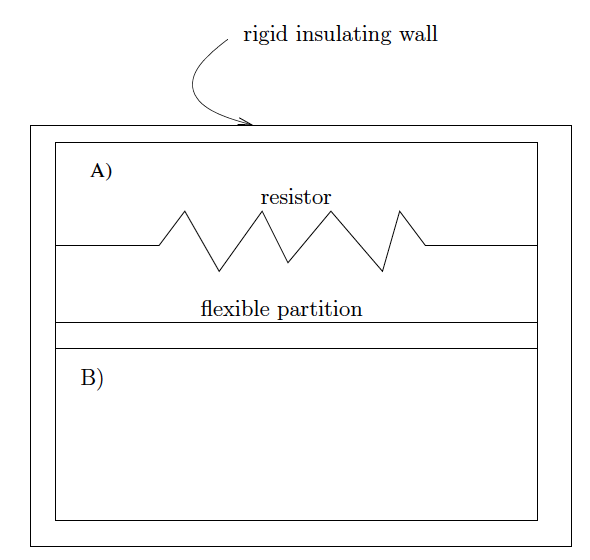

In [3]:
from IPython.display import Image
Image(filename="images/insulated_box.png")

## Solution

In [13]:
def theta_from_temp(temp,press):
    """
       Input: temp (K)
               press (kPa)
       Output: theta (K)
       Thompkins eq. 1.38
    """
    cpd=1004. #J/kg/K
    Rd = 287.  # J/kg/K
    p0 = 100   #kPa
    theta = temp*(p0/press)**(Rd/cpd)
    return theta

def temp_from_theta(theta,press):
    """Input: theta (K)
               press (kPa)
       Output: temp (K)
    """
    cpd=1004. #J/kg/K
    Rd = 287.  # J/kg/K
    p0 = 100   #kPa
    temp = theta/((p0/press)**(Rd/cpd))
    return temp
    
theta = theta_from_temp(273.,100.)
Tinitial = temp_from_theta(theta,100.)

print(f'test roundtrip for theta: theta={theta} K, Tinitial={Tinitial} K')

test roundtrip for theta: theta=273.0 K, Tinitial=273.0 K


## The final temperature $T_B$ (K) in box B

Use the fact that $\theta$ is constant in box B

In [10]:
Tfinal = temp_from_theta(theta,300.)
print(f"at press=300 kPa, the temperature in B is {Tfinal:8.3f} K")

at press=300 kPa, the temperature in B is  373.724 K


## work done by A on B

* $w = \int w_t dt = \int p_A d v_A$  where w is positive for work done on B and as in Thompkins, $v = 1/\rho = \text{Volume/mass}$

* (we know A is expanding, so $dv_A > 0$)

* The temperatures, pressures and densities are all initially the same in A and B, and since

* $v = 1 / \rho$  that means that  $v_A =v_B$ initially. 

* The mass in each compartment is
$\rho_A \times 1\ m^{3}$ = $\rho_B$ $\times$ 1 $m^{3}$ 
(since the volumes in each compartment are 1 $m^3$). 

* The total volume ($V_T$) doesn't change, so $V_A + V_B = V_T = 2\ m^3$ and $dV_A = - dV_B$.  
* Since the mass in each compartment is also constant that means $dv_A = - dv_B$. 

* Look at Thompkins 1.21 (using my notation):
 
  * $q_t   = \frac{du}{dt} + w_t = \frac{du}{dt}  + 
p\frac{dv}{dt} = c_v \frac{dT}{dt} + p \frac{dv}{dt}$  = 0 for compartment B


* So for compartment B:  $\int du = - \int w_t dt = - \int_{initial}^{final} c_v \frac{dT}{dt} dt = - c_v (Tfinal  - Tinitial)$

* The work done by B is a negative number  because it is undergoing compression, so $d v < 0$.  But since the pressure is always equal across the compartments  we know that work_done_by_B = - work_done_on_B


** Now put in the numbers **

In [12]:
cv = 718  #J/kg/K
work_done_on_B = cv*(Tfinal - Tinitial)
print(f"work done on B by A= {work_done_on_B:8.3e} J/kg")
print(f"work done on A by B= {-work_done_on_B:8.3e} J/kg")

work done on B by A= 7.232e+04 J/kg
work done on A by B= -7.232e+04 J/kg


## Final temperature of A

* We can get this from the equation of state (Thompkins 1.7) if we can figure out the density of A.  From the equation of state:

* $pV/T = n R_* = constant=C$.  

* Using our intial values of $p=1 \times 10^5\ Pa$, V=$1\ m^3$, T=273 K, $C=10^5/273 = p_B V_B/T_B$.

In [7]:
C = 1.e5/273  #J/K with V=1 m^3
p_B=3.e5  #Pa
T_B = Tfinal
V_B = C*T_B/p_B
print(f"final volume of B = {V_B:7.3f} m^3")
V_A = 2 - V_B  #total volume of 2 m^3 is conserved
print(f"final volume of A = {V_A:7.3f} m^3")

final volume of B =   0.456 m^3
final volume of A =   1.544 m^3


## Get temperature equation of state

In [8]:
p_A = 3.e5   #Pa
T_A = V_A*p_A/C
print("final Temperature of A= {:7.3f} K".format(T_A))

final Temperature of A= 1264.276 K


## Total heating of A

Using the 1st law we've got:

$\int q_t dt  = \int \frac{du}{dt} dt  + \int w_t dt = c_v (Tfinal - Tinitial)$ + work_done_on_B

In [9]:
heating_of_A = cv*(T_A - Tinitial) + work_done_on_B
print(f"heating of A = {heating_of_A:7.3e} J/kg")

heating of A = 7.841e+05 J/kg


In [15]:
import numpy
print(numpy.__file__)

/Users/phil/mini36/lib/python3.6/site-packages/numpy/__init__.py


In [17]:
import a405
print(a405.__path__)

_NamespacePath(['/Users/phil/repos/atsc405_2018/a405'])
